## A helper file to parse LSTM epoch/loss/dev F1 scores with regex

In [1]:
import re
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")

In [2]:
LSTM_RE = re.compile(r'^\[reRNN\] Epoch (\d+).*Average loss=(\d+\.?\d*).*Dev F1=(\d+\.?\d*).*$')
LSTM_RE = re.compile(r'.*Epoch (\d+).*$')

LSTM_regex = ur'^\[reRNN\] Epoch (\d+).*Average loss=(\d+\.?\d*).*Dev F1=(\d+\.?\d*).*$'


In [5]:
# with open("/home/antonis/results/exp3/LSTM training.txt") as f:
#     w1 = f.read()
    
# with open("/home/antonis/results/exp3/LSTM training avg.txt") as f:
#     w2 = f.read()

In [8]:
# df = pd.DataFrame(re.findall(LSTM_regex, w1, re.MULTILINE), columns=['epoch','training_loss', 'Validation F1'])

In [10]:
# df = df.applymap(lambda x: float(x))

In [4]:
# train_epochs.head()

In [67]:
# Load df with training stats from txt logs

model_log_paths = [
    "/home/antonis/results/exp3/LSTM training avg.txt",
    "/home/antonis/results/exp3/LSTM_training_random.txt",
]

train_logs = dict()
for model_log in model_log_paths:
    with open(model_log) as f:
#         log = f.read()

        # load df
        train_logs[model_log] = pd.DataFrame(re.findall(LSTM_regex, f.read(), re.MULTILINE), columns=['epoch','training_loss', 'Validation F1'])
        train_logs[model_log] = train_logs[model_log].applymap(lambda x: float(x)) #typecast str to float
    #     train_logs[model_log]['epoch'] +=1 # start epoch nr from 1
    
    print train_logs[model_log].head()

   epoch  training_loss  Validation F1
0    0.0       0.632720          39.32
1    1.0       0.469784          42.54
2    2.0       0.434243          41.59
3    3.0       0.415756          46.87
4    4.0       0.407203          43.99
   epoch  training_loss  Validation F1
0    0.0       0.539089          47.95
1    1.0       0.362377          47.94
2    2.0       0.285674          53.03
3    3.0       0.234345          51.10
4    4.0       0.196327          56.54


In [68]:
for model_log in model_log_paths:
    print len(train_logs[model_log])
    

40
25


### Visualize

In [69]:
# TODO: do it in function
# args:

# train_epochs = pd.DataFrame with epoch, training_loss, Validation F1
# test_scores = PRF1 @ test - optional, for title

In [ ]:




blue_line = mlines.Line2D([], [], marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

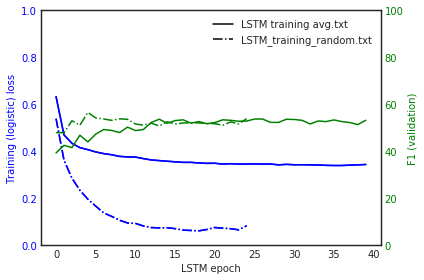

In [77]:
import matplotlib.lines as mlines
loss_color = 'b'
f1_color = 'g'
line_styles = ['-','-.',':','--', ]
line_handles = []

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for i,model_log in enumerate(model_log_paths):
     # choose linestyle depending on marginal weighting
    linestyle = line_styles[i]
    line_handles.append(mlines.Line2D([], [], linestyle=linestyle, label=model_log.split("/")[-1], color='k'))
    
    # plot train log loss
    ax1.plot(train_logs[model_log]['epoch'], train_logs[model_log]['training_loss'], color=loss_color, linestyle = linestyle)
    
    ax1.plot(train_logs[model_log]['epoch'], train_logs[model_log]['training_loss'], color=loss_color, linestyle = linestyle)
    
    # plot validation F1
    ax2.plot(train_logs[model_log]['epoch'], train_logs[model_log]['Validation F1'], color=f1_color, linestyle = linestyle)
    
#     break
ax1.set_ylabel('Training (logistic) loss', color=loss_color)
ax1.tick_params('y', colors=loss_color)
ax1.set_ylim([0,1])
ax2.set_ylabel('F1 (validation)', color=f1_color)
ax2.tick_params('y', colors=f1_color)
ax2.set_ylim([0,100])
ax1.set_xlabel('LSTM epoch')

plt.legend(handles=line_handles)
fig.tight_layout()
plt.show()

In [52]:
train_logs.keys()

['/home/antonis/results/exp3/LSTM training.txt',
 '/home/antonis/results/exp3/LSTM training avg.txt']

In [58]:
len(train_logs[train_logs.keys()[0]])

70

In [60]:
len(train_logs[model_log])

40